In [1]:
import pandas as pd
import os
import json
import re

In [2]:
#carga dataset de anotaciones de Medellin test
ruta_json='../raw/Medellin2/anotaciones/'
rows = []

for archivo in os.listdir(ruta_json):
      if archivo.endswith('.json'):
            ruta_archivo = os.path.join(ruta_json, archivo)
            with open(ruta_archivo, 'r', encoding='utf-8') as f:
                  data = json.load(f)
                  image_key = data.get("key")
                  img_width = data.get("width")
                  img_height = data.get("height")

                  match = re.search(r'_(\d+)\.', image_key)
                  frame = int(match.group(1)) if match else None


                  for box in data.get("boxes", []):
                        row = {
                              "file": image_key,
                              "frame": frame,
                              "image_width": img_width,
                              "image_height": img_height,
                              "id": box.get("id"),
                              "label": box.get("label"),
                              "x": float(box.get("x")),
                              "y": float(box.get("y")),
                              "w": float(box.get("width")),
                              "h": float(box.get("height")),
                              "confidence": box.get("confidence")
                        }
                        rows.append(row)

# Convert to DataFrame
df_mde = pd.DataFrame(rows)

In [3]:
df_mde.head()

,file,frame,image_width,image_height,id,label,x,y,w,h,confidence
0,frame_0000.jpg,0,1920,1080,1,DHelmet,251.45,568.60,66.99,87.08,None
1,frame_0000.jpg,0,1920,1080,2,DHelmetP1Helmet,402.17,616.78,72.65,89.66,None
2,frame_0000.jpg,0,1920,1080,3,DHelmet,737.61,800.47,82.96,99.45,None
3,frame_0000.jpg,0,1920,1080,4,DHelmet,1137.46,936.25,85.02,99.96,None
4,frame_0000.jpg,0,1920,1080,5,DHelmet,1309.82,1007.87,93.78,113.36,None


In [ ]:
# carga dataset de anotaciones de Birmania "
carpeta_csv = '../raw/Birmania/'

lista_dfs = []

for archivo in os.listdir(carpeta_csv):
    if archivo.endswith('.csv'):
        ruta_archivo = os.path.join(carpeta_csv, archivo)
        df = pd.read_csv(ruta_archivo)
        nombre_base = os.path.splitext(archivo)[0]
        df['nombre_carpeta'] = nombre_base
        df['frame'] = df['frame_id'].apply(lambda x: f'{x:02d}.jpg')
        lista_dfs.append(df)

# Concatena todos los DataFrames en uno solo
df_birmania = pd.concat(lista_dfs, ignore_index=True)
df_birmania.head()

,track_id,frame_id,x,y,w,h,label,nombre_carpeta,frame
0,_x4f29hsem,1,843,637,163,220,DNoHelmetP1NoHelmetP2NoHelmet,Bago_highway_1,01.jpg
1,_x4f29hsem,2,771,641,173,231,DNoHelmetP1NoHelmetP2NoHelmet,Bago_highway_1,02.jpg
2,_x4f29hsem,3,698,646,185,240,DNoHelmetP1NoHelmetP2NoHelmet,Bago_highway_1,03.jpg
3,_x4f29hsem,4,612,647,195,251,DNoHelmetP1NoHelmetP2NoHelmet,Bago_highway_1,04.jpg
4,_x4f29hsem,5,525,649,206,261,DNoHelmetP1NoHelmetP2NoHelmet,Bago_highway_1,05.jpg


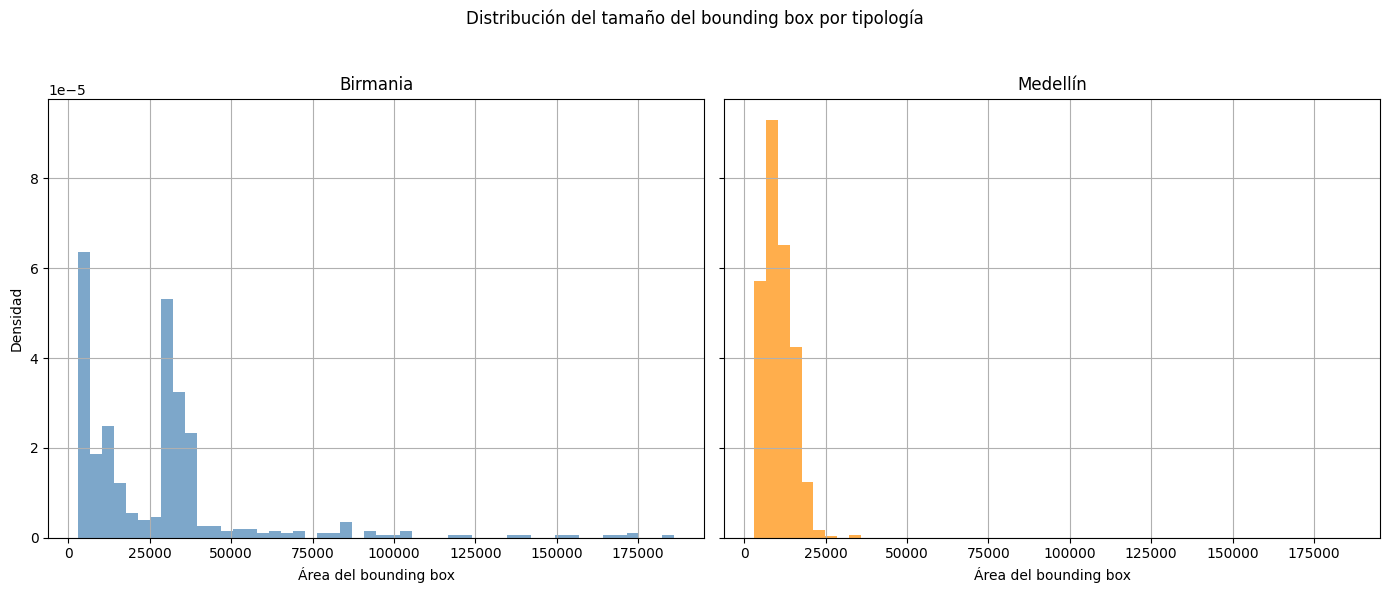

In [5]:
import matplotlib.pyplot as plt

# Calcular área del bounding box
df_birmania['bbox_area'] = df_birmania['w'] * df_birmania['h']
df_mde['bbox_area'] = df_mde['w'] * df_mde['h']

# Determinar rango común para el eje X
xmin = min(df_birmania['bbox_area'].min(), df_mde['bbox_area'].min())
xmax = max(df_birmania['bbox_area'].max(), df_mde['bbox_area'].max())

# Crear figura con 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Histograma para Birmania
axes[0].hist(df_birmania['bbox_area'], bins=50, range=(xmin, xmax), alpha=0.7, color='steelblue', density=True)
axes[0].set_title('Birmania')
axes[0].set_xlabel('Área del bounding box')
axes[0].set_ylabel('Densidad')
axes[0].grid(True)

# Histograma para Medellín
axes[1].hist(df_mde['bbox_area'], bins=50, range=(xmin, xmax), alpha=0.7, color='darkorange', density=True)
axes[1].set_title('Medellín')
axes[1].set_xlabel('Área del bounding box')
axes[1].grid(True)

plt.suptitle('Distribución del tamaño del bounding box por tipología')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


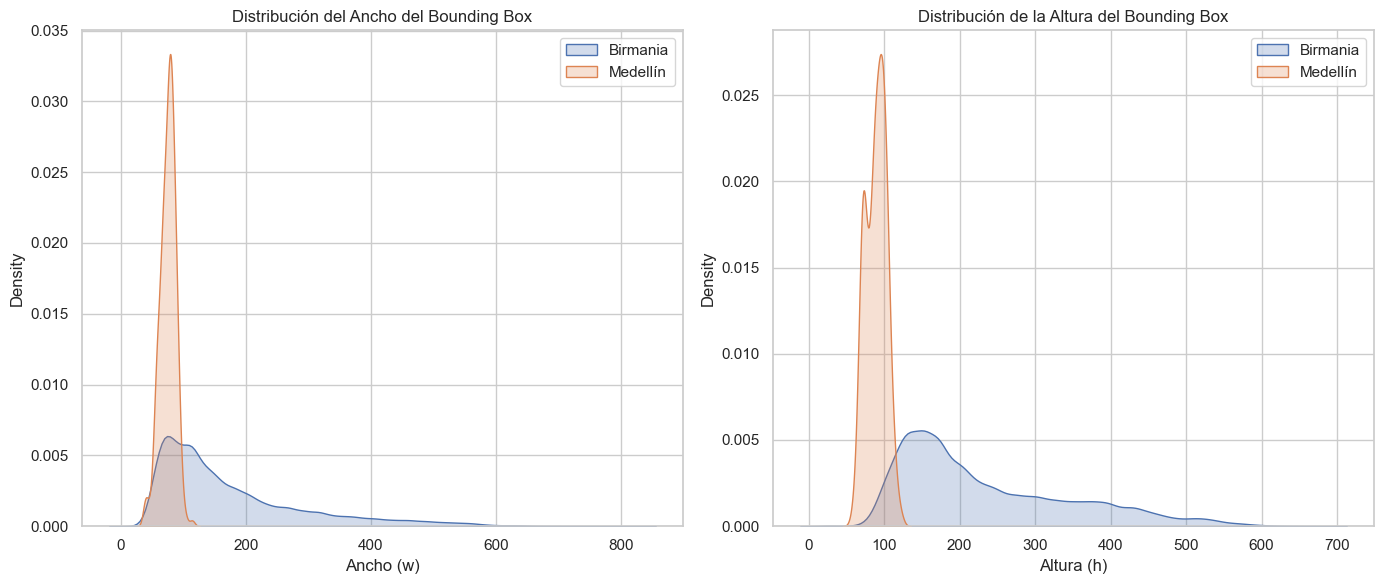

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de seaborn
sns.set(style="whitegrid")

# Figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Ancho (w)
sns.kdeplot(df_birmania['w'], ax=axes[0], label='Birmania', fill=True)
sns.kdeplot(df_mde['w'], ax=axes[0], label='Medellín', fill=True)
axes[0].set_title('Distribución del Ancho del Bounding Box')
axes[0].set_xlabel('Ancho (w)')
axes[0].legend()

# Altura (h)
sns.kdeplot(df_birmania['h'], ax=axes[1], label='Birmania', fill=True)
sns.kdeplot(df_mde['h'], ax=axes[1], label='Medellín', fill=True)
axes[1].set_title('Distribución de la Altura del Bounding Box')
axes[1].set_xlabel('Altura (h)')
axes[1].legend()

plt.tight_layout()
plt.show()


In [50]:
# Conteo por clase
birmania_counts = df_birmania['label'].value_counts().sort_index()
medellin_counts = df_mde['label'].value_counts().sort_index()

# Mostrar como DataFrame comparativo
import pandas as pd

label_dist = pd.DataFrame({
    'Birmania': birmania_counts,
    'Medellín': medellin_counts
}).fillna(0).astype(int)

print(label_dist)

                                                   Birmania  Medellín
label                                                                
DHelmet                                              113620       169
DHelmetP0Helmet                                         274         0
DHelmetP0HelmetP1Helmet                                 563         0
DHelmetP0HelmetP1HelmetP2Helmet                          18         0
DHelmetP0HelmetP1NoHelmetP2Helmet                       100         0
DHelmetP0HelmetP1NoHelmetP2NoHelmet                      22         0
DHelmetP0NoHelmet                                       868         0
DHelmetP0NoHelmetP1Helmet                              1047         0
DHelmetP0NoHelmetP1HelmetP2Helmet                        46         0
DHelmetP0NoHelmetP1NoHelmet                             637         0
DHelmetP0NoHelmetP1NoHelmetP2Helmet                     468         0
DHelmetP0NoHelmetP1NoHelmetP2NoHelmet                   180         0
DHelmetP0NoHelmetP1N

In [51]:
pd.DataFrame({
    'Birmania': birmania_counts,
    'Medellín': medellin_counts
}).dropna()

,Birmania,Medellín
label,,
DHelmet,113620,169.0
DHelmetP1Helmet,57142,75.0
DHelmetP1NoHelmet,12202,6.0
DNoHelmet,49815,1.0


In [63]:
# Labels permitidos
labels_permitidos = {"DHelmet", "DHelmetP1Helmet", "DHelmetP1NoHelmet", "DNoHelmet"}

# Crear columna única por archivo
df_birmania["archivo"] = df_birmania.apply(
    lambda row: f'{row["nombre_carpeta"].lower()}_{int(row["frame_id"]):03d}.jpg',
    axis=1
)

# Agrupar por archivo y obtener el set de labels usados en cada uno
labels_por_archivo = df_birmania.groupby("archivo")["label"].apply(set)

# Filtrar los archivos que SOLO tienen labels permitidos (subconjunto)
archivos_validos = labels_por_archivo[labels_por_archivo.apply(lambda x: x.issubset(labels_permitidos))]

# Resultado: número de archivos válidos
print(f"Total de archivos que solo tienen los labels deseados: {len(archivos_validos)}")

Total de archivos que solo tienen los labels deseados: 50546


In [64]:
archivos_validos

archivo
bago_highway_10_001.jpg    {DNoHelmet, DHelmetP1Helmet}
bago_highway_10_002.jpg    {DNoHelmet, DHelmetP1Helmet}
bago_highway_10_003.jpg    {DNoHelmet, DHelmetP1Helmet}
bago_highway_10_004.jpg    {DNoHelmet, DHelmetP1Helmet}
bago_highway_10_005.jpg                     {DNoHelmet}
                                       ...             
yangon_ii_8_096.jpg                {DNoHelmet, DHelmet}
yangon_ii_8_097.jpg                {DNoHelmet, DHelmet}
yangon_ii_8_098.jpg                {DNoHelmet, DHelmet}
yangon_ii_8_099.jpg                {DNoHelmet, DHelmet}
yangon_ii_8_100.jpg                {DNoHelmet, DHelmet}
Name: label, Length: 50546, dtype: object

In [65]:
#guardar archivos_validos a un csv solo con los nombres de los archivos
archivos_validos = archivos_validos.reset_index()
archivos_validos.to_csv('../raw/archivos_validos_birmania.csv', index=False)

In [66]:
archivos_validos

,archivo,label
0,bago_highway_10_001.jpg,"{DNoHelmet, DHelmetP1Helmet}"
1,bago_highway_10_002.jpg,"{DNoHelmet, DHelmetP1Helmet}"
2,bago_highway_10_003.jpg,"{DNoHelmet, DHelmetP1Helmet}"
3,bago_highway_10_004.jpg,"{DNoHelmet, DHelmetP1Helmet}"
4,bago_highway_10_005.jpg,{DNoHelmet}
...,...,...
50541,yangon_ii_8_096.jpg,"{DNoHelmet, DHelmet}"
50542,yangon_ii_8_097.jpg,"{DNoHelmet, DHelmet}"
50543,yangon_ii_8_098.jpg,"{DNoHelmet, DHelmet}"
50544,yangon_ii_8_099.jpg,"{DNoHelmet, DHelmet}"


In [67]:
#copia del dataset de birmania solo los archivos validos tanto labels como imagenes
import os
import shutil
from tqdm import tqdm

# Paths
source_images = "../../NoHelmetDataset/dataset/dataset/images/train"
source_labels = "../../NoHelmetDataset/dataset/dataset/labels/train"
target_images = "../dataset/images/birmania"
target_labels = "../dataset/labels/birmania"

archivos_validos_list = archivos_validos["archivo"].unique()

# Copiar imágenes y labels
for archivo in tqdm(archivos_validos_list):
    img_src = os.path.join(source_images, archivo)
    lbl_src = os.path.join(source_labels, archivo.replace(".jpg", ".txt"))

    img_dst = os.path.join(target_images, archivo)
    lbl_dst = os.path.join(target_labels, archivo.replace(".jpg", ".txt"))

    # Copiar si existen
    if os.path.exists(img_src) and os.path.exists(lbl_src):
        shutil.copy(img_src, img_dst)
        shutil.copy(lbl_src, lbl_dst)
    else:
        print(f"⚠️ Archivo faltante: {archivo}")


  0%|          | 0/50546 [00:00<?, ?it/s]

100%|██████████| 50546/50546 [36:14<00:00, 23.25it/s]  


Calculando metricas de estilo para asemejar el dataset de birmania a medellin

In [71]:
import os
import cv2
import numpy as np
import random
from tqdm import tqdm

def analizar_estilo_visual(image_dir, max_samples=None):
    brightness_list = []
    contrast_list = []
    saturation_list = []

    all_images = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]

    if max_samples is not None and len(all_images) > max_samples:
        all_images = random.sample(all_images, max_samples)

    for img_file in tqdm(all_images, desc=f"Analizando {image_dir}"):
        img_path = os.path.join(image_dir, img_file)
        img = cv2.imread(img_path)

        if img is None:
            continue

        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        brightness = np.mean(hsv[:, :, 2])
        contrast = np.std(hsv[:, :, 2])
        saturation = np.mean(hsv[:, :, 1])

        brightness_list.append(brightness)
        contrast_list.append(contrast)
        saturation_list.append(saturation)

    metrics = {
        'brillo_promedio': np.mean(brightness_list),
        'contraste_promedio': np.mean(contrast_list),
        'saturacion_promedio': np.mean(saturation_list)
    }

    return metrics


In [72]:
ruta_medellin = "../dataset/images/test"
ruta_birmania = "../dataset/images/birmania"

metrics_med = analizar_estilo_visual(ruta_medellin)
metrics_bir = analizar_estilo_visual(ruta_birmania, max_samples=500)

print("📍 Medellín:")
for k, v in metrics_med.items():
    print(f"{k}: {v:.2f}")

print("\n📍 Birmania (500 muestras):")
for k, v in metrics_bir.items():
    print(f"{k}: {v:.2f}")


Analizando ../dataset/images/birmania: 100%|██████████| 500/500 [00:06<00:00, 79.84it/s]

📍 Medellín:
brillo_promedio: 143.87
contraste_promedio: 60.17
saturacion_promedio: 33.31

📍 Birmania (500 muestras):
brillo_promedio: 139.13
contraste_promedio: 61.74
saturacion_promedio: 62.66


Hay que reducir la saturación de Birmania para que se parezca más a medellin con: transformaciones en birmania

Histograma de color:

In [ ]:
import cv2
import numpy as np
import os
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

def calcular_histograma_color(path_img_dir, bins=256, max_samples=None):
    # Inicializar acumuladores por canal: B, G, R
    hist_b = np.zeros(bins)
    hist_g = np.zeros(bins)
    hist_r = np.zeros(bins)

    # Listar imágenes y aplicar submuestra si se indica
    all_images = [f for f in os.listdir(path_img_dir) if f.endswith(".jpg")]
    if max_samples is not None and len(all_images) > max_samples:
        all_images = random.sample(all_images, max_samples)

    n_imgs = 0

    for fname in tqdm(all_images, desc=f"Procesando {path_img_dir}"):
        img_path = os.path.join(path_img_dir, fname)
        img = cv2.imread(img_path)

        if img is None:
            continue

        for i, hist_accum in enumerate([hist_b, hist_g, hist_r]):
            hist = cv2.calcHist([img], [i], None, [bins], [0, 256])
            hist_accum += hist[:, 0]

        n_imgs += 1

    # Normalizar por cantidad de imágenes
    if n_imgs > 0:
        hist_b /= n_imgs
        hist_g /= n_imgs
        hist_r /= n_imgs

    return hist_b, hist_g, hist_r

Procesando ../dataset/images/birmania: 100%|██████████| 500/500 [00:04<00:00, 110.28it/s]


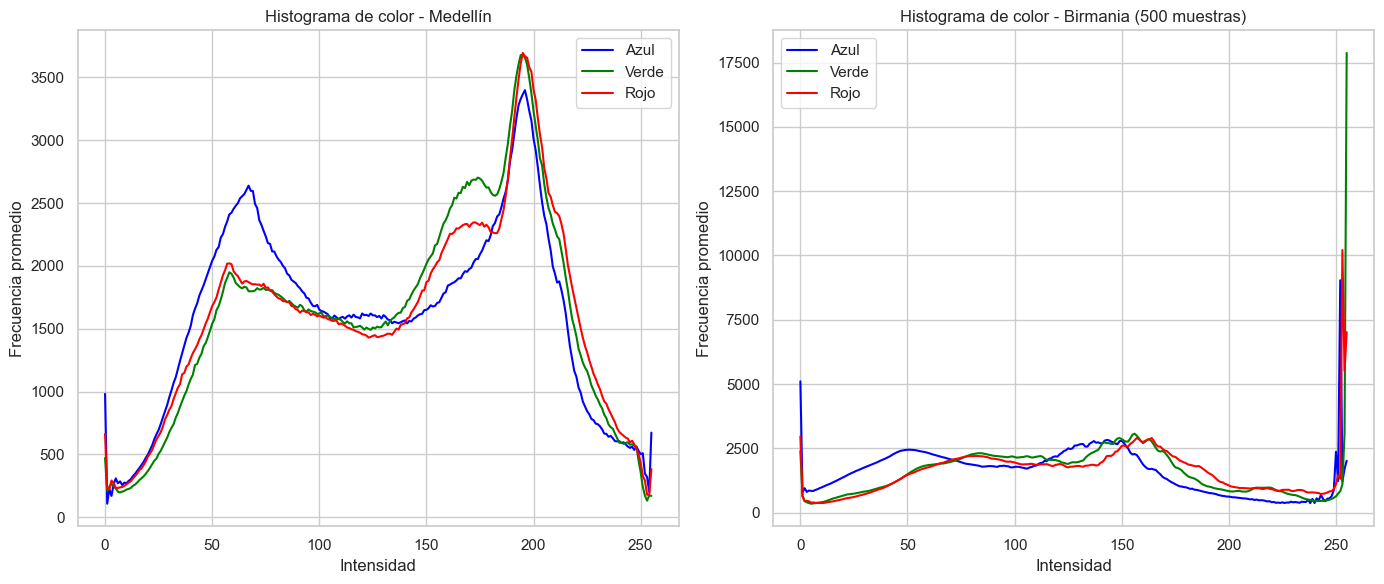

In [75]:
# Directorios
ruta_medellin = "../dataset/images/test"
ruta_birmania = "../dataset/images/birmania"

# Cálculo
hist_b_med, hist_g_med, hist_r_med = calcular_histograma_color(ruta_medellin)
hist_b_bir, hist_g_bir, hist_r_bir = calcular_histograma_color(ruta_birmania, max_samples=500)

# Graficar
plt.figure(figsize=(14, 6))

# Medellín
plt.subplot(1, 2, 1)
plt.plot(hist_b_med, color='blue', label='Azul')
plt.plot(hist_g_med, color='green', label='Verde')
plt.plot(hist_r_med, color='red', label='Rojo')
plt.title("Histograma de color - Medellín")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia promedio")
plt.legend()

# Birmania
plt.subplot(1, 2, 2)
plt.plot(hist_b_bir, color='blue', label='Azul')
plt.plot(hist_g_bir, color='green', label='Verde')
plt.plot(hist_r_bir, color='red', label='Rojo')
plt.title("Histograma de color - Birmania (500 muestras)")
plt.xlabel("Intensidad")
plt.ylabel("Frecuencia promedio")
plt.legend()

plt.tight_layout()
plt.show()


Medellin tiene una distribución bimodal rica en tonos mientras que Birmania tiene un pico enorme en el rango 250 blanco/luz
Medellin tiene colores balanceados entre rojo verde y azul, en Birmania el color que domina es el verde en alto brillo
Medellin tiene curvas suaves y tonos más neutros y Birmania confirmando el analisis de saturación tiene colores muy vivos con sobreexposición

Hay que reducir la saturación y brillo de Birmania


Calculando punto de fuga promedio para determinar la diferencia en ángulo de la toma

In [76]:
import cv2
import numpy as np
import os
import random
from tqdm import tqdm

def detectar_vanishing_point(img_path):
    img = cv2.imread(img_path)
    if img is None:
        return None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)

    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)
    if lines is None:
        return None

    # Convertimos líneas a forma ax + by + c = 0
    points = []
    for line in lines[:100]:  # limitamos por eficiencia
        x1, y1, x2, y2 = line[0]
        A = y2 - y1
        B = x1 - x2
        C = x2 * y1 - x1 * y2
        points.append((A, B, C))

    def intersection(l1, l2):
        A1, B1, C1 = l1
        A2, B2, C2 = l2
        det = A1 * B2 - A2 * B1
        if det == 0:
            return None
        x = (B1 * C2 - B2 * C1) / det
        y = (C1 * A2 - C2 * A1) / det
        return (x, y)

    intersections = []
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            pt = intersection(points[i], points[j])
            if pt and all(np.isfinite(pt)):
                intersections.append(pt)

    if not intersections:
        return None

    vp_x = np.median([p[0] for p in intersections])
    vp_y = np.median([p[1] for p in intersections])
    return (vp_x, vp_y)

def calcular_vanishing_point_promedio(carpeta, max_samples=500):
    all_images = [f for f in os.listdir(carpeta) if f.endswith(".jpg")]

    if len(all_images) > max_samples:
        all_images = random.sample(all_images, max_samples)

    vp_list = []

    for fname in tqdm(all_images, desc=f"Procesando {carpeta}"):
        img_path = os.path.join(carpeta, fname)
        vp = detectar_vanishing_point(img_path)
        if vp:
            vp_list.append(vp)

    if vp_list:
        vp_prom_x = np.median([p[0] for p in vp_list])
        vp_prom_y = np.median([p[1] for p in vp_list])
        print(f"📍 Punto de fuga promedio para {carpeta}:\n  X = {vp_prom_x:.2f}, Y = {vp_prom_y:.2f}")
        return (vp_prom_x, vp_prom_y)
    else:
        print(f"⚠️ No se detectaron puntos de fuga en {carpeta}")
        return None


In [77]:
vp_medellin = calcular_vanishing_point_promedio("../dataset/images/test")
vp_birmania = calcular_vanishing_point_promedio("../dataset/images/birmania", max_samples=500)

Procesando ../dataset/images/test: 100%|██████████| 22/22 [00:02<00:00, 10.83it/s]


📍 Punto de fuga promedio para ../dataset/images/test:
  X = 339.00, Y = 266.50


Procesando ../dataset/images/birmania: 100%|██████████| 500/500 [00:28<00:00, 17.55it/s]

📍 Punto de fuga promedio para ../dataset/images/birmania:
  X = 272.25, Y = 239.05


La camara de Medellin está más inclinada hacia abajo, y apuntando desde una posición elevada (como vigilancia y tráfico urbano)
En Birmania el punto de fuga está más bajo y desplazado, indica una vista más horizontal o frontal, tomada desde nivel de suelo o de forma perpendicular.

Se debe aplicar una transformación de perspectiva sobre el dataset de birmania